In [1]:
# importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from keras import regularizers
from keras.regularizers import l2, l1
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, save_img
import os
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [2]:
train_data_path = '../data/aug_red_eye/training_aug/train'
val_data_path = '../data/aug_red_eye/training_aug/val'
test_data_path = '../data/aug_red_eye/training_aug/test'

In [3]:
batchsize = 10
train_datagen = ImageDataGenerator(
        rescale=1./255,
        fill_mode="nearest")
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_data_path,
        color_mode="rgb",
        target_size=(128, 128),
        batch_size=batchsize,
        class_mode="categorical",
        subset='training',
        shuffle=True,
        seed=42
        )
validation_generator = val_datagen.flow_from_directory(
        val_data_path,
        color_mode="rgb",
        target_size=(128, 128),
        batch_size=batchsize,
        class_mode="categorical",
        subset='training',
        shuffle=True,
        seed=42
        )

test_generator = test_datagen.flow_from_directory(
        test_data_path,
        color_mode="rgb",
        target_size=(128, 128),
        batch_size=1,
        shuffle = False,
        class_mode='categorical',
        seed = 42)

Found 949 images belonging to 2 classes.
Found 169 images belonging to 2 classes.
Found 11 images belonging to 2 classes.


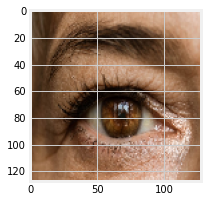

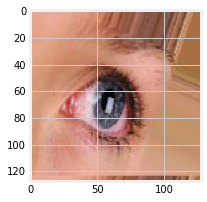

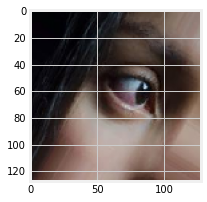

In [4]:
x_train, y_train = train_generator.__next__()


# checking/ verifying if the image and masks are coorelated
for i in range(0,3):
    image = x_train[i]
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.show()

In [5]:
K.clear_session()

#defining the CNN2D model
model = Sequential([

    Conv2D(filters= 6, kernel_size=(3,3), strides=(1,1), input_shape=x_train[0].shape,
           activation=keras.activations.relu,
           padding='valid',kernel_regularizer=l2(0.0001)), # valid means no padding  #

    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding= 'valid'),
    
    Conv2D(filters = 16, kernel_size=(3,3),strides=(1,1),
           activation=keras.activations.relu, 
           padding = 'valid',kernel_regularizer=l2(0.0001)), # valid means no padding #,kernel_regularizer=l2(0.0001)
    
    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding= 'valid'), # valid means no padding
    
    Flatten(),
    
    # Fully connected dense layer with relu activation function
    Dropout(0.3),
    Dense(units=128, activation=keras.activations.relu),
    BatchNormalization(),
    
    # Fully connected dense layer with relu activation function
#     Dropout(0.2),
#     Dense(units=128, activation=keras.activations.relu),
#     BatchNormalization(),

    # Fully connected dense layer with relu activation function
    Dropout(0.3),
    Dense(units=64, activation=keras.activations.relu),
    BatchNormalization(),

    # Fully connected dense layer with relu activation function
    Dropout(0.3),
    Dense(units=32, activation=keras.activations.relu),
    BatchNormalization(),

    # Fully connected output layer with softmax
    Dense(units=2, activation=keras.activations.sigmoid)   # How many neurons? we want classify two classes
])


In [6]:
# compling the model
model.compile(optimizer=keras.optimizers.Adam(0.5e-4), 
                loss=keras.losses.binary_crossentropy, metrics=['accuracy','Recall','Precision'])

cb = keras.callbacks.EarlyStopping(monitor="accuracy",
                                    min_delta=0.005,
                                    patience=30,
                                    verbose=1,
                                    mode="min",
                                    baseline=None,
                                    restore_best_weights=False)

In [7]:
history = model.fit(train_generator,
        batch_size = 30, 
        epochs = 150,
        verbose = 1, 
        validation_data = validation_generator)

Epoch 1/150
95/95 [==============================] - 8s 33ms/step - loss: 0.8195 - accuracy: 0.5680 - recall: 0.5342 - precision: 0.5399 - val_loss: 0.6997 - val_accuracy: 0.4970 - val_recall: 0.0178 - val_precision: 0.7500
Epoch 2/150
95/95 [==============================] - 2s 25ms/step - loss: 0.7375 - accuracy: 0.6312 - recall: 0.5711 - precision: 0.5834 - val_loss: 0.6838 - val_accuracy: 0.5917 - val_recall: 0.1243 - val_precision: 0.6774
Epoch 3/150
95/95 [==============================] - 3s 29ms/step - loss: 0.6551 - accuracy: 0.7018 - recall: 0.6544 - precision: 0.6628 - val_loss: 0.6370 - val_accuracy: 0.7337 - val_recall: 0.3432 - val_precision: 0.8169
Epoch 4/150
95/95 [==============================] - 2s 26ms/step - loss: 0.6145 - accuracy: 0.7460 - recall: 0.6754 - precision: 0.6885 - val_loss: 0.5887 - val_accuracy: 0.7337 - val_recall: 0.5799 - val_precision: 0.7597
Epoch 5/150
95/95 [==============================] - 3s 27ms/step - loss: 0.5561 - accuracy: 0.7756 - re

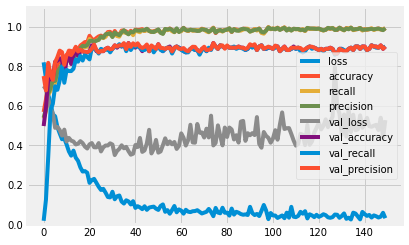

In [8]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1.1) # set the y range to [0,1]
plt.show()

In [9]:
# pd.DataFrame(model.history).plot()
# plt.grid(True)
# plt.gca().set_ylim(0,1.1) # set the y range to [0,1]
# plt.show()
print('Model Evalution Score')
print(model.evaluate(test_generator))

Model Evalution Score
11/11 [==============================] - 0s 4ms/step - loss: 0.0872 - accuracy: 0.9091 - recall: 0.9091 - precision: 0.9091
[0.08718009293079376, 0.9090909361839294, 0.9090909361839294, 0.9090909361839294]


In [10]:
pred_path = '../data/aug_red_eye/prediction_images'
number_of_images = '../data/aug_red_eye/prediction_images/prediction'
img_list_len = len(os.listdir(number_of_images))
batch_size = int(img_list_len)
pred_datagen = ImageDataGenerator(rescale=1./255)
pred_generator = pred_datagen.flow_from_directory(
    directory= pred_path,
    target_size=(128, 128),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode=None,
    shuffle=False,
    seed=42
)

Found 9 images belonging to 1 classes.


1/1 [==============================] - 0s 51ms/step
Normal_Eye


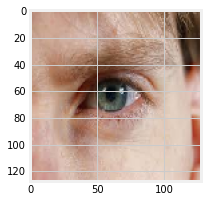

1/1 [==============================] - 0s 66ms/step
Red_Eye


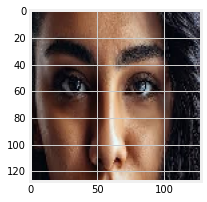

1/1 [==============================] - 0s 45ms/step
Red_Eye


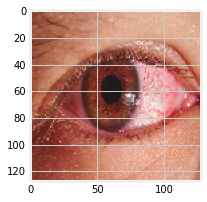

1/1 [==============================] - 0s 45ms/step
Red_Eye


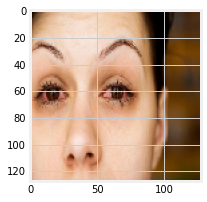

1/1 [==============================] - 0s 45ms/step
Red_Eye


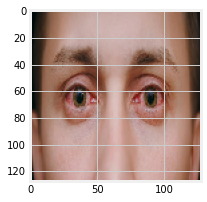

1/1 [==============================] - 0s 41ms/step
Normal_Eye


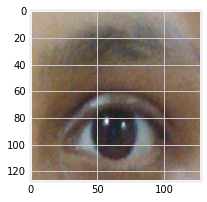

1/1 [==============================] - 0s 47ms/step
Red_Eye


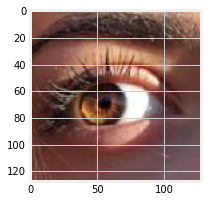

1/1 [==============================] - 0s 42ms/step
Normal_Eye


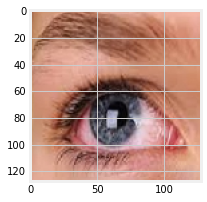

In [13]:
x_pred = pred_generator.__next__()


# checking/ verifying if the image and masks are coorelated
for i in range(0,batch_size-1):
    image = x_pred[i]
    plt.subplot(1,2,1)
    predict=model.predict(pred_generator)
    y_classes = predict.argmax(axis=-1)
    if y_classes[i] == 0:
        print('Normal_Eye')
    else:
        print('Red_Eye')
    #print(y_classes[i])
    plt.imshow(image)
    plt.show()


    
# predict the class label



In [14]:
predict=model.predict(pred_generator)
# predict the class label
y_classes = predict.argmax(axis=-1)
print(y_classes)

1/1 [==============================] - 0s 37ms/step
[0 1 1 1 1 0 1 0 0]
